### IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
# auxiliary funtionsto import
from utils import score, display, syncing

### LOAD DATA

In [2]:
# Read in data files
DATA_DIR = 'data/nfl-health-and-safety-helmet-assignment'

In [3]:
# Labels and sample submission
labels = pd.read_csv(f'{DATA_DIR}/train_labels.csv')
ss = pd.read_csv(f'{DATA_DIR}/sample_submission.csv')

# Player tracking data
tr_tracking = pd.read_csv(f'{DATA_DIR}/train_player_tracking.csv')
te_tracking = pd.read_csv(f'{DATA_DIR}/test_player_tracking.csv')

# Baseline helmet detection labels
tr_helmets = pd.read_csv(f'{DATA_DIR}/train_baseline_helmets.csv')
te_helmets = pd.read_csv(f'{DATA_DIR}/test_baseline_helmets.csv')

# Extra image labels
img_labels = pd.read_csv(f'{DATA_DIR}/image_labels.csv')

In [4]:
SUBMISSION_COLUMNS = ss.columns # Expected submission columns
print(f'SUBMISSION_COLUMNS: {SUBMISSION_COLUMNS.values}')

SUBMISSION_COLUMNS: ['video_frame' 'label' 'left' 'width' 'top' 'height']


### SCORE

In [5]:
# The sample submission meets these requirements.
score.check_submission(ss)

True

In [6]:
compute_naive_scores = False

if compute_naive_scores:

    # Initialize a helper scorer to to assist in scoring the local predictions.
    # Note that this is not the exact code used in the kaggle scoring system, but results should be nearly identical.
    scorer = score.NFLAssignmentScorer(labels)

    # Score the sample submission
    ss_score = scorer.score(ss)
    print(f'Sample submission scores: {ss_score:0.4f}')

    # Score a submission with only impacts
    perfect_impacts = labels.query('isDefinitiveImpact == True and isSidelinePlayer == False')
    imp_score = scorer.score(perfect_impacts)
    print(f'A submission with perfect predictions only for impacts scores: {imp_score:0.4f}')

    # Score a submission with only non-impacts
    perfect_nonimpacts = labels.query('isDefinitiveImpact == False and isSidelinePlayer == False')
    nonimp_score = scorer.score(perfect_nonimpacts)
    print(f'A submission with perfect predictions only for non-impacts scores: {nonimp_score:0.4f}')

    # Score a perfect submission
    perfect_train = labels.query('isSidelinePlayer == False')[SUBMISSION_COLUMNS].copy()
    perfect_score = scorer.score(perfect_train)
    print(f'A perfrect training submission scores: {perfect_score:0.4f}')

After scoring, the sub_labels dataframe within the NFLAssignmentScorer object can be used to evaluate results including the iou between predictions and ground truth boxes and isCorrect for correct labels. Ground truth fields have the suffix _gt while submission fields have the suffix _sub.

In [7]:
if compute_naive_scores:
    scorer.sub_labels.head()

### DISPLAY

In [8]:
create_labeled_video = False
if create_labeled_video:
    example_video = f'{DATA_DIR}/train/57584_000336_Sideline.mp4'
    output_video_path = display.video_with_baseline_boxes(example_video, tr_helmets, labels)
else:
    output_video_path = 'labeled_57584_000336_Sideline.mp4'

display.display_video(output_video_path)

### SYNCING

In [9]:
# syncing the 2D data to the video frames
tr_tracking = syncing.add_track_features(tr_tracking)
te_tracking = syncing.add_track_features(te_tracking)

In [24]:
tr_tracking.head(150)

,gameKey,playID,player,time,x,y,s,a,dis,o,dir,event,game_play,snap,isSnap,team,snap_offset,est_frame
0,57583,82,H97,2018-09-14 00:23:45.500000+00:00,38.89,28.06,0.0,0.00,0.00,261.28,222.79,NaN,57583_000082,2018-09-14 00:24:00.200000+00:00,False,Home,-14.700,-871
1,57583,82,H97,2018-09-14 00:23:45.599000+00:00,38.89,28.06,0.0,0.00,0.00,261.28,221.93,NaN,57583_000082,2018-09-14 00:24:00.200000+00:00,False,Home,-14.601,-865
2,57583,82,H97,2018-09-14 00:23:45.700000+00:00,38.89,28.06,0.0,0.00,0.00,261.28,221.21,NaN,57583_000082,2018-09-14 00:24:00.200000+00:00,False,Home,-14.500,-859
3,57583,82,H97,2018-09-14 00:23:45.799000+00:00,38.88,28.05,0.0,0.00,0.00,261.28,220.07,NaN,57583_000082,2018-09-14 00:24:00.200000+00:00,False,Home,-14.401,-853
4,57583,82,H97,2018-09-14 00:23:45.900000+00:00,38.88,28.05,0.0,0.00,0.00,261.28,220.31,NaN,57583_000082,2018-09-14 00:24:00.200000+00:00,False,Home,-14.300,-847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,57583,82,H97,2018-09-14 00:24:00+00:00,35.56,28.89,0.0,0.00,0.00,248.30,51.27,NaN,57583_000082,2018-09-14 00:24:00.200000+00:00,False,Home,-0.200,-2
146,57583,82,H97,2018-09-14 00:24:00.099000+00:00,35.56,28.89,0.0,0.00,0.00,250.13,49.54,NaN,57583_000082,2018-09-14 00:24:00.200000+00:00,False,Home,-0.101,4
147,57583,82,H97,2018-09-14 00:24:00.200000+00:00,35.56,28.89,0.0,0.00,0.00,247.29,47.40,ball_snap,57583_000082,2018-09-14 00:24:00.200000+00:00,True,Home,0.000,10
148,57583,82,H97,2018-09-14 00:24:00.299000+00:00,35.56,28.89,0.0,0.00,0.00,253.11,46.71,NaN,57583_000082,2018-09-14 00:24:00.200000+00:00,False,Home,0.099,16


### DISPLAY 2D

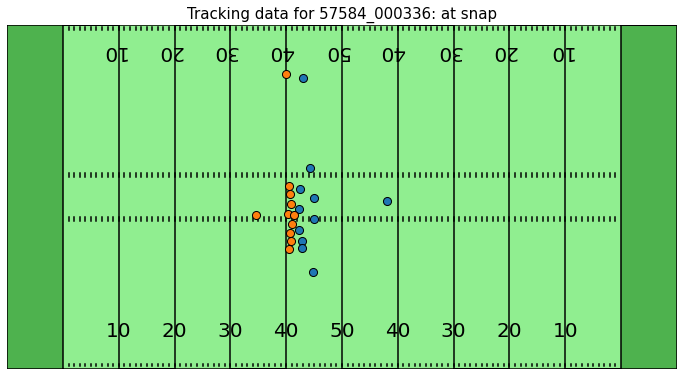

In [53]:
game_play = "57584_000336"
event = 'ball_snap'

example_tracks = plot_football_field_action(tr_tracking, game_play, event)



In [21]:
example_tracks.event.unique()

array(['huddle_start_offense', nan, 'huddle_break_offense', 'line_set',
       'ball_snap', 'handoff', 'first_contact', 'out_of_bounds'],
      dtype=object)